In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC

In [ ]:
olist_orders_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_order_reviews_dataset.csv")
olist_order_payments_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_order_payments_dataset.csv")
olist_order_items_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_order_items_dataset.csv")
olist_customers_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_customers_dataset.csv")
olist_products_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_products_dataset.csv")
olist_sellers_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/product_category_name_translation.csv")
# olist_geolocation_dataset = pd.read_csv("/content/drive/MyDrive/AML_Project/Brazilian E-Commerce Public Dataset/olist_geolocation_dataset.csv")

In [ ]:
df = pd.merge(olist_orders_dataset, olist_order_reviews_dataset, on = "order_id", how="inner")
df = pd.merge(df, olist_order_payments_dataset, on = "order_id", how="inner")
df = pd.merge(df, olist_order_items_dataset, on = "order_id", how="inner")
df = pd.merge(df, olist_customers_dataset, on = "customer_id", how="inner")
df = pd.merge(df, olist_products_dataset, on="product_id", how="inner")
df = pd.merge(df, olist_sellers_dataset, on="seller_id", how="inner")
df = pd.merge(df, product_category_name_translation, on = "product_category_name", how ="inner")
#df = pd.merge(df, olist_geolocation_dataset, left_on = "customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix", how="left")
#df = pd.merge(df, olist_geolocation_dataset, left_on = "seller_zip_code_prefix", right_on = "geolocation_zip_code_prefix", how="left")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,fdbbec4b750e768ac12c054acd906d1d,5,...,232.0,1.0,7600.0,55.0,15.0,55.0,89701,concordia,SC,la_cuisine
115605,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,429.0,1.0,2700.0,85.0,7.0,40.0,89701,concordia,SC,la_cuisine
115606,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,429.0,1.0,2700.0,85.0,7.0,40.0,89701,concordia,SC,la_cuisine
115607,c72888e51a36defb7b5d49201fcbccf7,c3cd86c3cbac654f8558a8286ba93c1c,delivered,2017-07-11 10:45:57,2017-07-11 10:55:14,2017-07-11 19:14:48,2017-07-19 17:27:43,2017-08-04 00:00:00,80d6f91212fb5216bfc90feddee75581,5,...,532.0,1.0,3600.0,30.0,30.0,30.0,13720,scao jose do rio pardo,SP,la_cuisine


In [ ]:
list(df.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'product_category_name_english']

In [ ]:
df['review_score'].value_counts()

review_score
5    65374
4    21951
1    14546
3     9718
2     4020
Name: count, dtype: int64

In [ ]:
columns_to_keep = ['order_delivered_customer_date', 'order_estimated_delivery_date',
    'review_score', 'payment_type', 'payment_installments', 'product_photos_qty' , 'price', 'freight_value', 'product_category_name_english', 'seller_state',]


df = df[columns_to_keep]
df

,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_type,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state
0,2017-10-10 21:25:13,2017-10-18 00:00:00,4,credit_card,1,4.0,29.99,8.72,housewares,SP
1,2017-10-10 21:25:13,2017-10-18 00:00:00,4,voucher,1,4.0,29.99,8.72,housewares,SP
2,2017-10-10 21:25:13,2017-10-18 00:00:00,4,voucher,1,4.0,29.99,8.72,housewares,SP
3,2017-08-18 14:44:43,2017-08-28 00:00:00,4,credit_card,3,4.0,29.99,7.78,housewares,SP
4,2017-08-07 18:30:01,2017-08-15 00:00:00,5,credit_card,1,4.0,29.99,7.78,housewares,SP
...,...,...,...,...,...,...,...,...,...,...
115604,2017-08-17 18:28:10,2017-09-05 00:00:00,5,credit_card,5,1.0,174.00,39.06,la_cuisine,SC
115605,2017-08-09 20:38:07,2017-08-28 00:00:00,5,credit_card,2,1.0,129.00,26.18,la_cuisine,SC
115606,2017-08-09 20:38:07,2017-08-28 00:00:00,5,voucher,1,1.0,129.00,26.18,la_cuisine,SC
115607,2017-07-19 17:27:43,2017-08-04 00:00:00,5,credit_card,1,1.0,119.99,27.16,la_cuisine,SP


In [ ]:
import pandas as pd

df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df['delivery_time_diff'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

df

<ipython-input-12-5eaf197d1373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
<ipython-input-12-5eaf197d1373>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
<ipython-input-12-5eaf197d1373>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_type,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff
0,2017-10-10 21:25:13,2017-10-18,4,credit_card,1,4.0,29.99,8.72,housewares,SP,-8.0
1,2017-10-10 21:25:13,2017-10-18,4,voucher,1,4.0,29.99,8.72,housewares,SP,-8.0
2,2017-10-10 21:25:13,2017-10-18,4,voucher,1,4.0,29.99,8.72,housewares,SP,-8.0
3,2017-08-18 14:44:43,2017-08-28,4,credit_card,3,4.0,29.99,7.78,housewares,SP,-10.0
4,2017-08-07 18:30:01,2017-08-15,5,credit_card,1,4.0,29.99,7.78,housewares,SP,-8.0
...,...,...,...,...,...,...,...,...,...,...,...
115604,2017-08-17 18:28:10,2017-09-05,5,credit_card,5,1.0,174.00,39.06,la_cuisine,SC,-19.0
115605,2017-08-09 20:38:07,2017-08-28,5,credit_card,2,1.0,129.00,26.18,la_cuisine,SC,-19.0
115606,2017-08-09 20:38:07,2017-08-28,5,voucher,1,1.0,129.00,26.18,la_cuisine,SC,-19.0
115607,2017-07-19 17:27:43,2017-08-04,5,credit_card,1,1.0,119.99,27.16,la_cuisine,SP,-16.0


In [ ]:
df.loc[:, 'order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df.loc[:, 'order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df.loc[:, 'delivery_time_diff'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

In [ ]:
df.drop(['order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)


<ipython-input-14-33cacd3feab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)


In [ ]:
df

,review_score,payment_type,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff
0,4,credit_card,1,4.0,29.99,8.72,housewares,SP,7.0
1,4,voucher,1,4.0,29.99,8.72,housewares,SP,7.0
2,4,voucher,1,4.0,29.99,8.72,housewares,SP,7.0
3,4,credit_card,3,4.0,29.99,7.78,housewares,SP,9.0
4,5,credit_card,1,4.0,29.99,7.78,housewares,SP,7.0
...,...,...,...,...,...,...,...,...,...
115604,5,credit_card,5,1.0,174.00,39.06,la_cuisine,SC,18.0
115605,5,credit_card,2,1.0,129.00,26.18,la_cuisine,SC,18.0
115606,5,voucher,1,1.0,129.00,26.18,la_cuisine,SC,18.0
115607,5,credit_card,1,1.0,119.99,27.16,la_cuisine,SP,15.0


<ipython-input-12-5d19d5be9729>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='count', data=order_count_by_review, palette='colorblind')


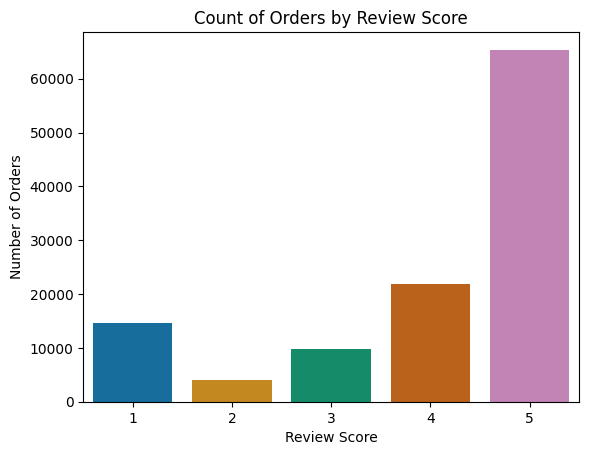

In [ ]:
order_count_by_review = df['review_score'].value_counts().sort_index().reset_index()
order_count_by_review.columns = ['review_score', 'count']
sns.barplot(x='review_score', y='count', data=order_count_by_review, palette='colorblind')
plt.title('Count of Orders by Review Score')
plt.ylabel('Number of Orders')
plt.xlabel('Review Score')
plt.show()


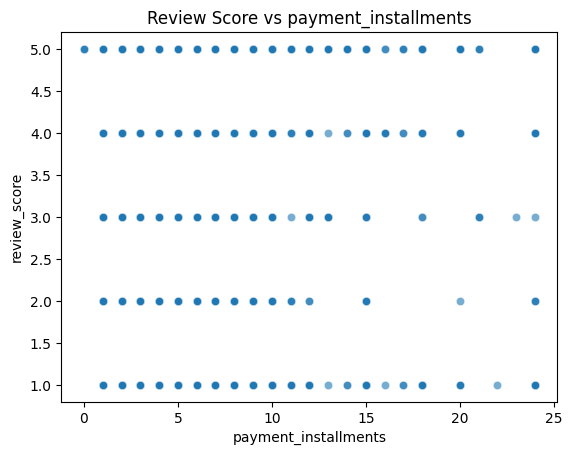

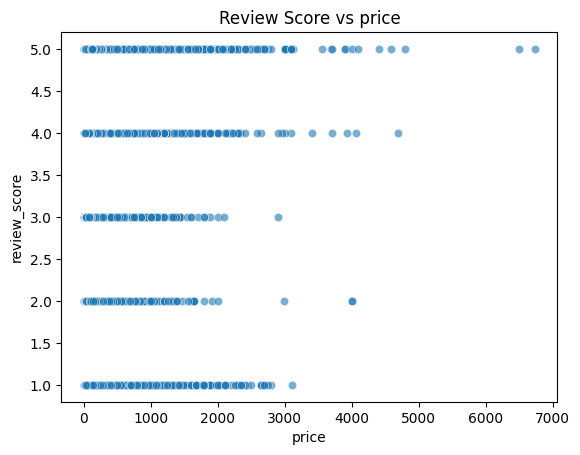

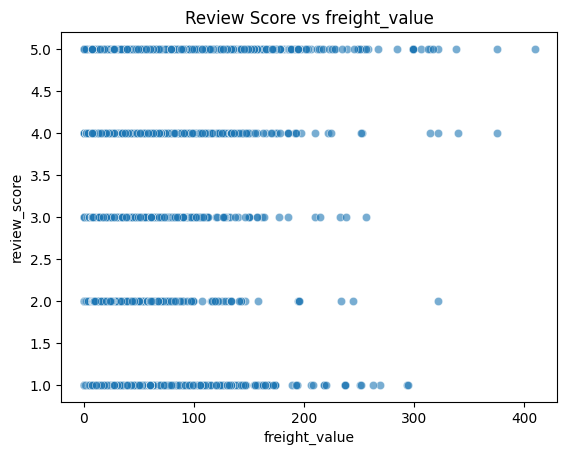

In [ ]:

variables = ['payment_installments', 'price', 'freight_value']
for var in variables:
    sns.scatterplot(data=df, x=var, y='review_score', alpha=0.6)
    plt.title(f'Review Score vs {var}')
    plt.show()


1. review_score - examine if items with worse reviews are purchased less frequently
2. payment_value, price

<ipython-input-13-047ac302b1ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='payment_value', data=payment_value_by_review, palette='pastel')


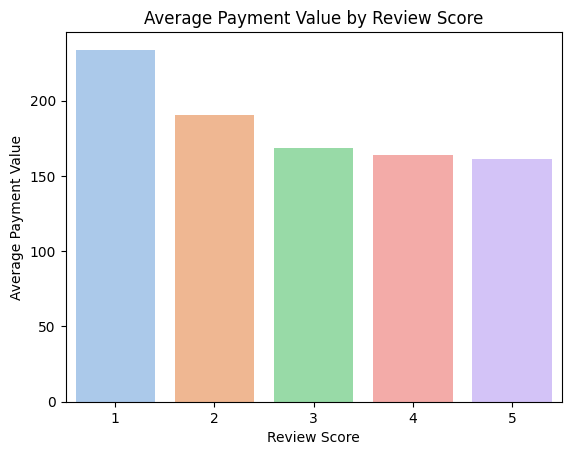

In [ ]:
payment_value_by_review = df.groupby('review_score')['payment_value'].mean().reset_index()
sns.barplot(x='review_score', y='payment_value', data=payment_value_by_review, palette='pastel')
plt.title('Average Payment Value by Review Score')
plt.ylabel('Average Payment Value')
plt.xlabel('Review Score')
plt.show()


<ipython-input-14-126fd9a8338a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='freight_value', data=avg_freight_value_by_review, palette='muted')


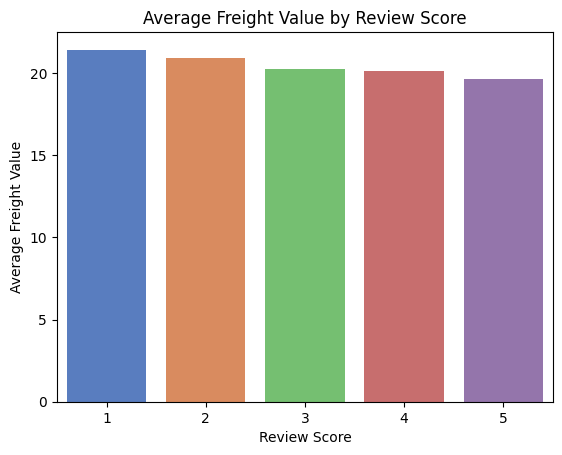

In [ ]:
avg_freight_value_by_review = df.groupby('review_score')['freight_value'].mean().reset_index()
sns.barplot(x='review_score', y='freight_value', data=avg_freight_value_by_review, palette='muted')
plt.title('Average Freight Value by Review Score')
plt.ylabel('Average Freight Value')
plt.xlabel('Review Score')
plt.show()


<ipython-input-15-932d4eb03ef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_time_days'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days


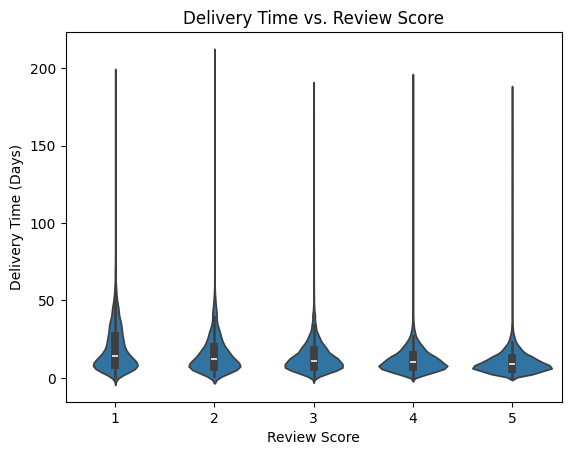

In [ ]:
df['delivery_time_days'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days
sns.violinplot(x='review_score', y='delivery_time_days', data=df)
plt.title('Delivery Time vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (Days)')
plt.show()



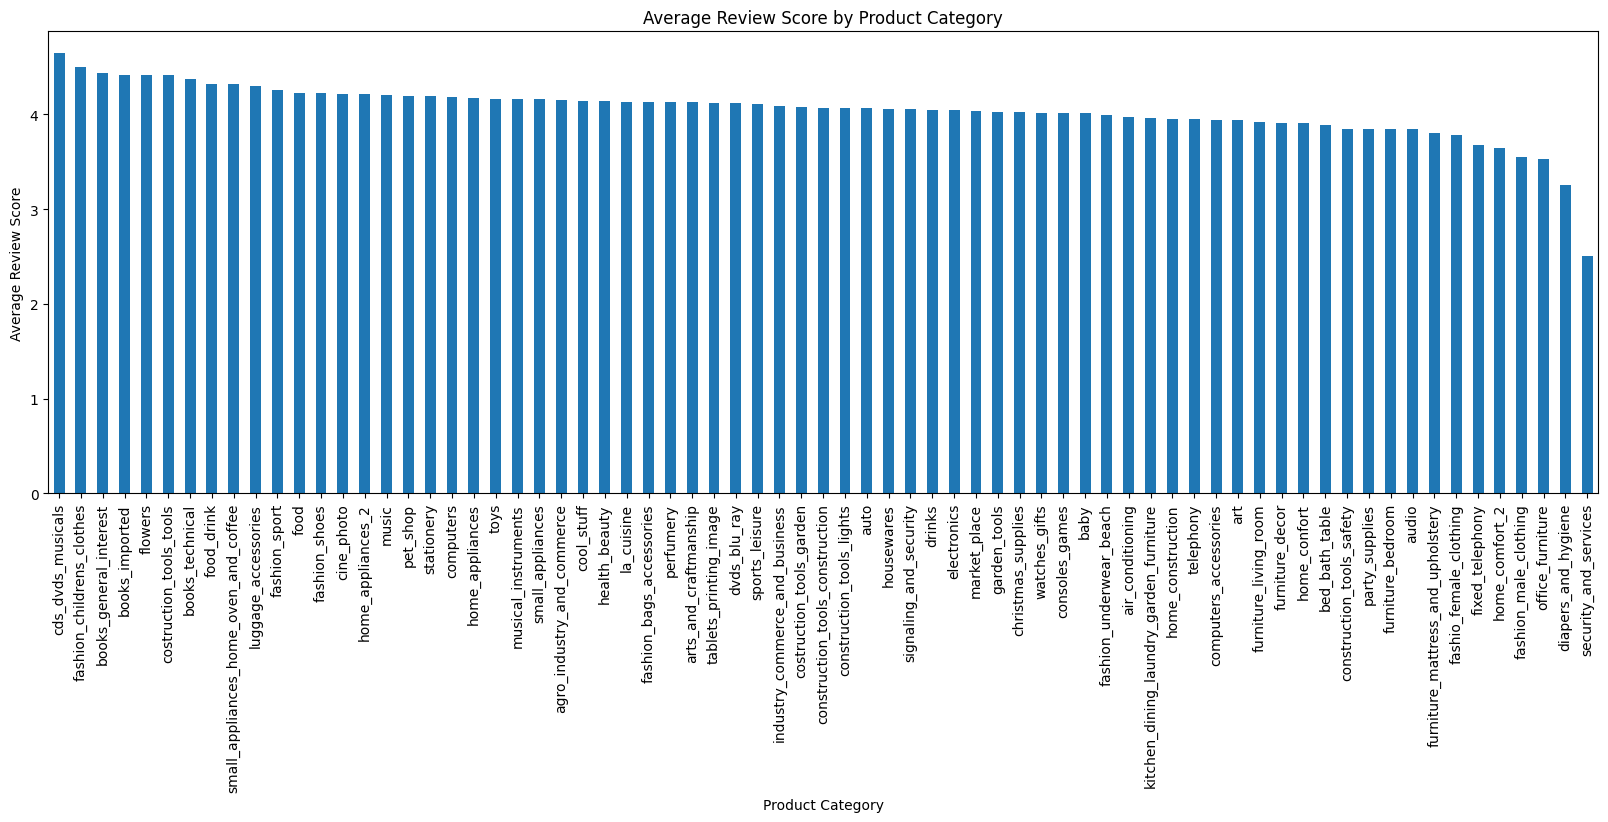

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Review Score by Product Category')
plt.ylabel('Average Review Score')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.show()


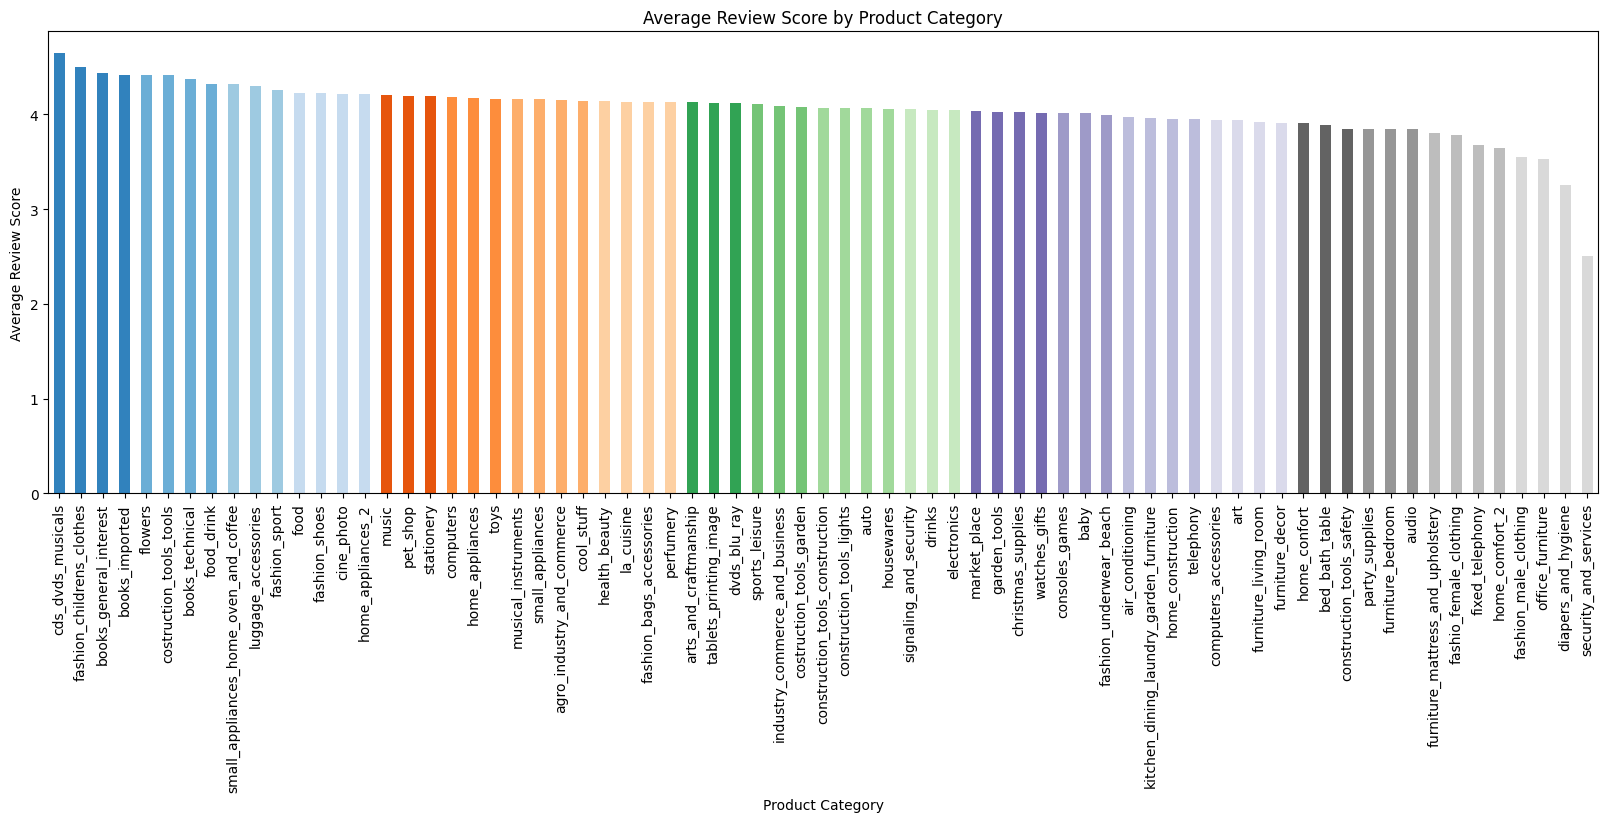

In [ ]:
categories = df['product_category_name_english'].nunique()
colors = plt.cm.tab20c(np.linspace(0, 1, categories))

plt.figure(figsize=(20, 6))

sorted_categories = df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)

sorted_categories.plot(kind='bar', color=colors)
plt.title('Average Review Score by Product Category')
plt.ylabel('Average Review Score')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.show()

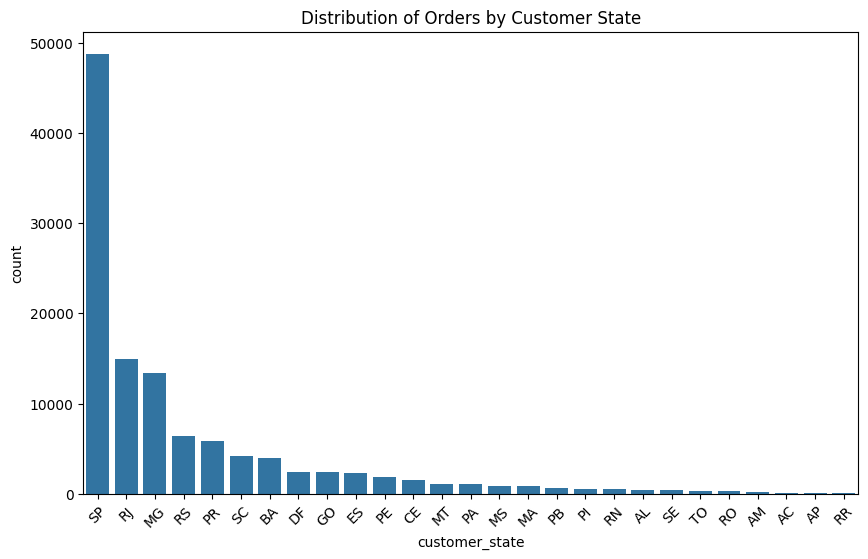

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index)
plt.title('Distribution of Orders by Customer State')
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-f5fd368257f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])


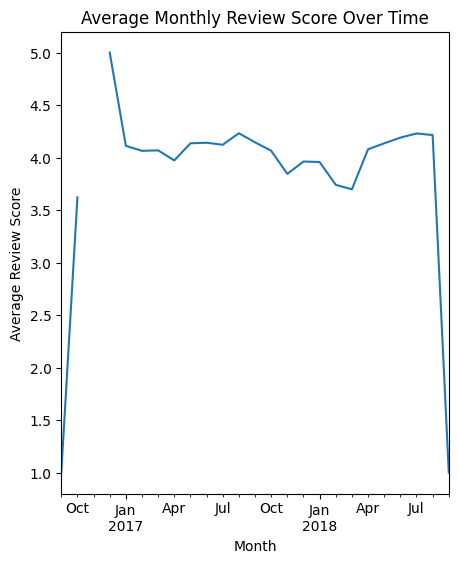

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.set_index('order_purchase_timestamp', inplace=True)
monthly_review_scores = df['review_score'].resample('M').mean()
plt.figure(figsize=(5, 6))
monthly_review_scores.plot()
plt.title('Average Monthly Review Score Over Time')
plt.ylabel('Average Review Score')
plt.xlabel('Month')
plt.show()


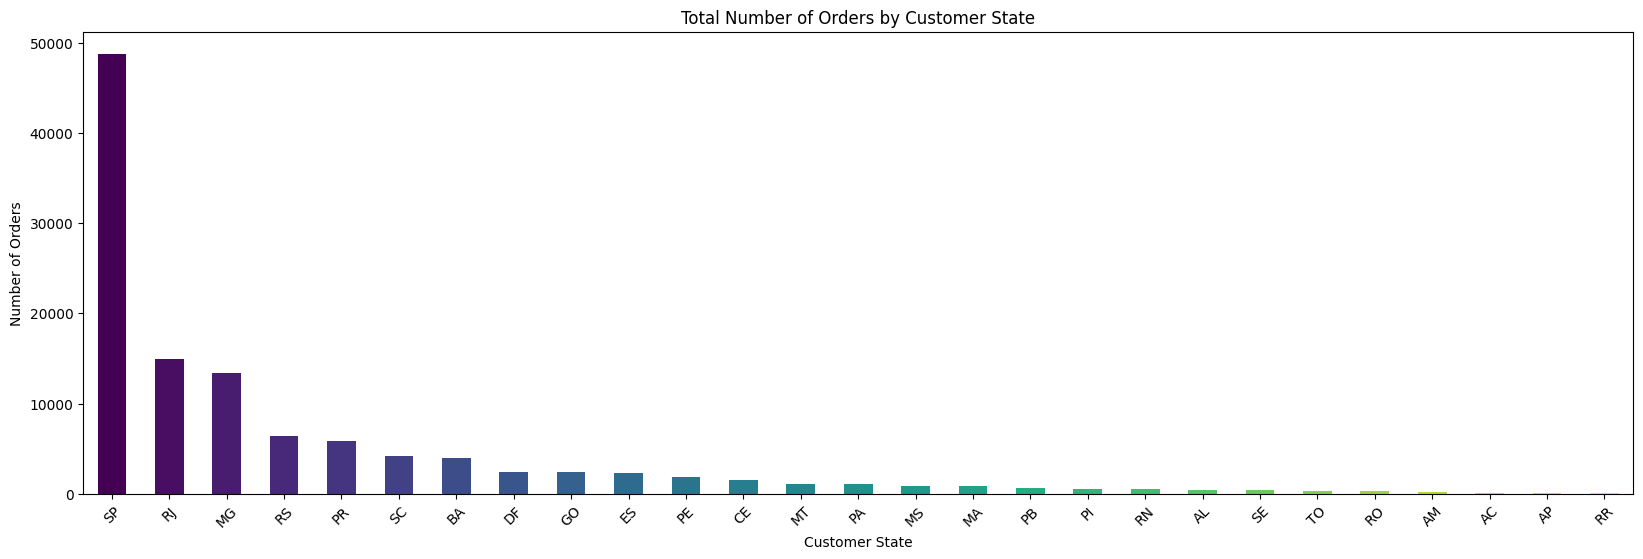

In [ ]:
orders_by_state = df['customer_state'].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(orders_by_state)))

plt.figure(figsize=(20, 6))
orders_by_state.plot(kind='bar', color=colors)
plt.title('Total Number of Orders by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


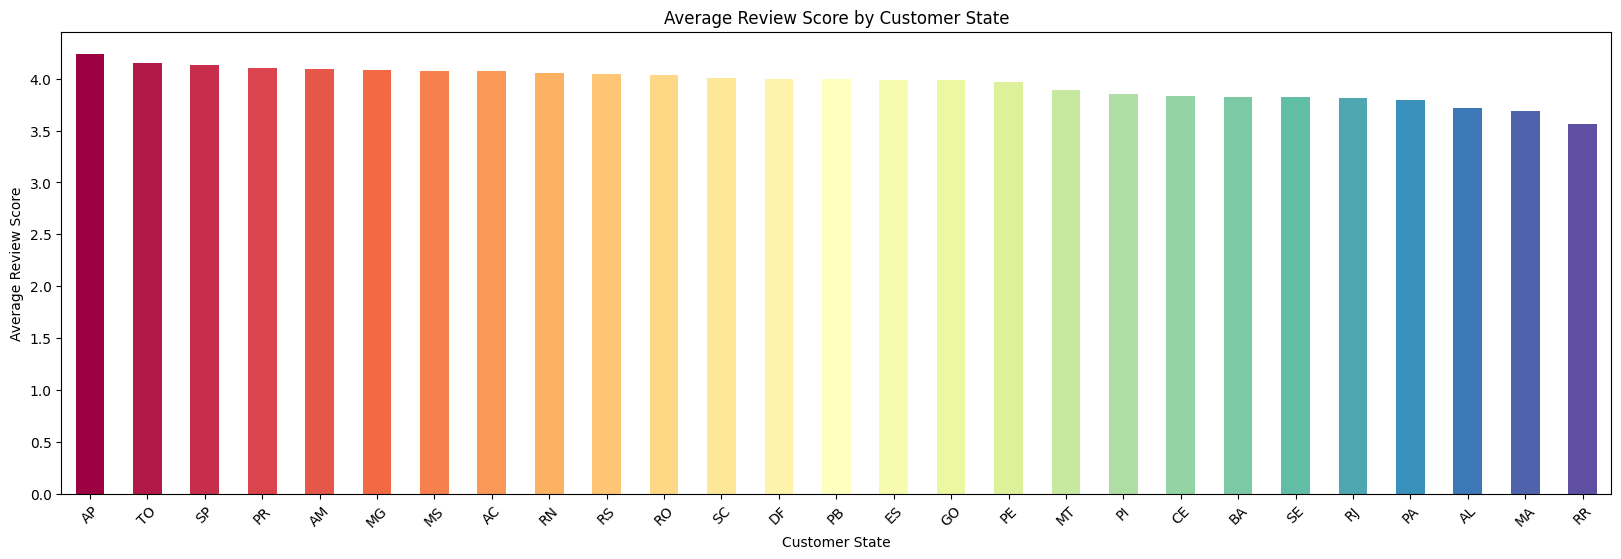

In [ ]:
avg_review_by_state = df.groupby('customer_state')['review_score'].mean()

avg_review_by_state_sorted = avg_review_by_state.sort_values(ascending=False)

colors = plt.cm.Spectral(np.linspace(0, 1, len(avg_review_by_state_sorted)))

plt.figure(figsize=(20, 6))
avg_review_by_state_sorted.plot(kind='bar', color=colors)
plt.title('Average Review Score by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()


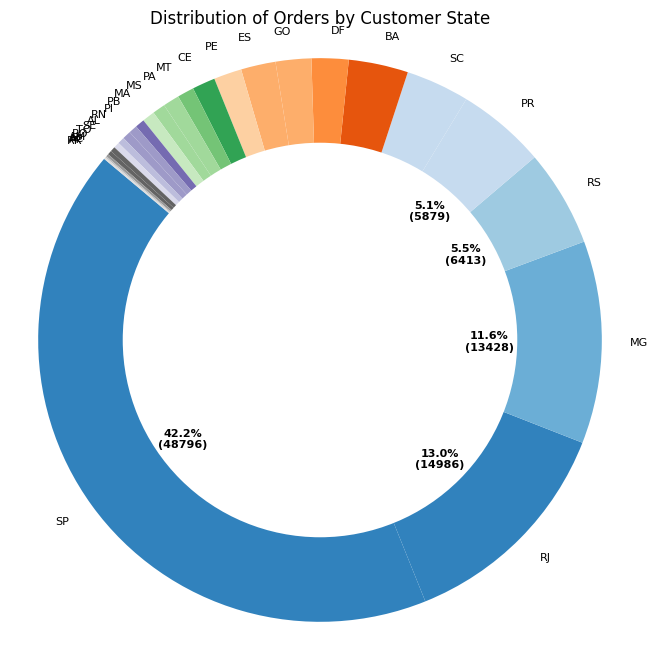

In [ ]:

order_counts = df['customer_state'].value_counts()


colors = plt.cm.tab20c(np.linspace(0, 1, order_counts.size))

def label_function(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})" if pct > 5 else ""

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(order_counts, labels=order_counts.index, autopct=lambda pct: label_function(pct, order_counts),
                                   startangle=140, colors=colors, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.setp(texts, size=8)
plt.setp(autotexts, size=8, weight="bold")
plt.title('Distribution of Orders by Customer State')

plt.show()


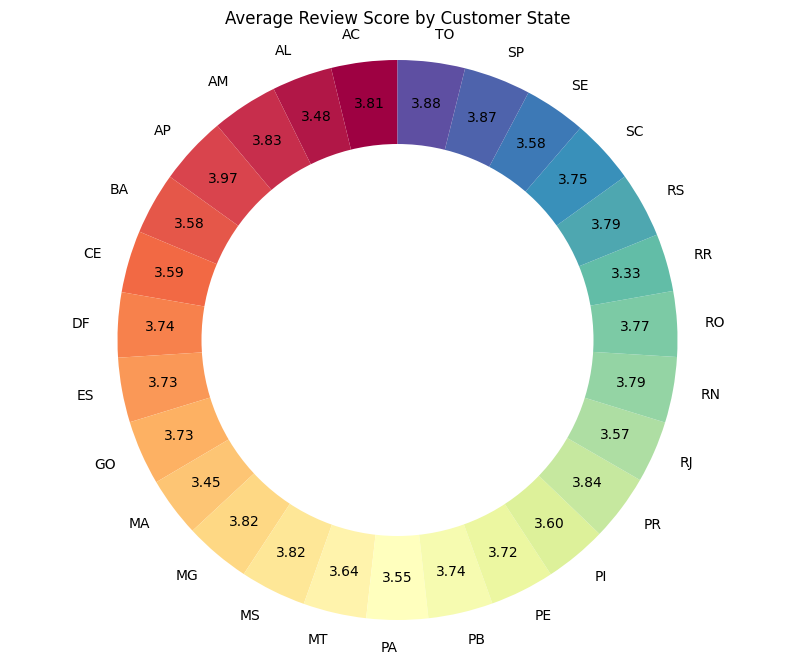

In [ ]:
avg_review_scores = df.groupby('customer_state')['review_score'].mean()

colors = plt.cm.Spectral(np.linspace(0, 1, len(avg_review_scores)))

def label_function(val):
    return f'{val:.2f}'

plt.figure(figsize=(10, 8))
plt.pie(avg_review_scores, labels=avg_review_scores.index, autopct=label_function, startangle=90, colors=colors,
        pctdistance=0.85, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Average Review Score by Customer State')

plt.show()


# DATA CLEANING

**Outliers**

In [ ]:
null_values = df.isnull().sum()
print(null_values)

review_score                        0
payment_type                        0
payment_installments                0
product_photos_qty                  0
price                               0
freight_value                       0
product_category_name_english       0
seller_state                        0
delivery_time_diff               2400
dtype: int64


In [ ]:
median_delivery_time_diff = df['delivery_time_diff'].median()

df['delivery_time_diff'].fillna(median_delivery_time_diff, inplace=True)


<ipython-input-17-4762b499a373>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_time_diff'].fillna(median_delivery_time_diff, inplace=True)


In [ ]:
null_values = df.isnull().sum()

In [ ]:
null_values

review_score                     0
payment_type                     0
payment_installments             0
product_photos_qty               0
price                            0
freight_value                    0
product_category_name_english    0
seller_state                     0
delivery_time_diff               0
dtype: int64

In [ ]:
df

,review_score,payment_type,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff
0,4,credit_card,1,4.0,29.99,8.72,housewares,SP,7.0
1,4,voucher,1,4.0,29.99,8.72,housewares,SP,7.0
2,4,voucher,1,4.0,29.99,8.72,housewares,SP,7.0
3,4,credit_card,3,4.0,29.99,7.78,housewares,SP,9.0
4,5,credit_card,1,4.0,29.99,7.78,housewares,SP,7.0
...,...,...,...,...,...,...,...,...,...
115604,5,credit_card,5,1.0,174.00,39.06,la_cuisine,SC,18.0
115605,5,credit_card,2,1.0,129.00,26.18,la_cuisine,SC,18.0
115606,5,voucher,1,1.0,129.00,26.18,la_cuisine,SC,18.0
115607,5,credit_card,1,1.0,119.99,27.16,la_cuisine,SP,15.0


In [ ]:
df['payment_type'].value_counts()

payment_type
credit_card    85278
boleto         22510
voucher         6162
debit_card      1659
Name: count, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-22-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df

,review_score,payment_type,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff
0,4,credit_card,1,4.0,29.99,8.72,housewares,SP,7.0
1,4,voucher,1,4.0,29.99,8.72,housewares,SP,7.0
3,4,credit_card,3,4.0,29.99,7.78,housewares,SP,9.0
4,5,credit_card,1,4.0,29.99,7.78,housewares,SP,7.0
5,3,boleto,1,4.0,29.99,14.10,housewares,SP,5.0
...,...,...,...,...,...,...,...,...,...
115604,5,credit_card,5,1.0,174.00,39.06,la_cuisine,SC,18.0
115605,5,credit_card,2,1.0,129.00,26.18,la_cuisine,SC,18.0
115606,5,voucher,1,1.0,129.00,26.18,la_cuisine,SC,18.0
115607,5,credit_card,1,1.0,119.99,27.16,la_cuisine,SP,15.0


In [ ]:
payment_type_order = {
    'credit_card': 3,
    'boleto': 2,
    'voucher': 1,
    'debit_card': 0
}

df['payment_type_encoded'] = df['payment_type'].map(payment_type_order)

print(df[['payment_type', 'payment_type_encoded']].head())


  payment_type  payment_type_encoded
0  credit_card                     3
1      voucher                     1
3  credit_card                     3
4  credit_card                     3
5       boleto                     2


<ipython-input-24-011658ec3632>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_type_encoded'] = df['payment_type'].map(payment_type_order)


In [ ]:
df.drop('payment_type', axis=1, inplace=True)


<ipython-input-25-17318e3bdc2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('payment_type', axis=1, inplace=True)


In [ ]:
df

,review_score,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff,payment_type_encoded
0,4,1,4.0,29.99,8.72,housewares,SP,7.0,3
1,4,1,4.0,29.99,8.72,housewares,SP,7.0,1
3,4,3,4.0,29.99,7.78,housewares,SP,9.0,3
4,5,1,4.0,29.99,7.78,housewares,SP,7.0,3
5,3,1,4.0,29.99,14.10,housewares,SP,5.0,2
...,...,...,...,...,...,...,...,...,...
115604,5,5,1.0,174.00,39.06,la_cuisine,SC,18.0,3
115605,5,2,1.0,129.00,26.18,la_cuisine,SC,18.0,3
115606,5,1,1.0,129.00,26.18,la_cuisine,SC,18.0,1
115607,5,1,1.0,119.99,27.16,la_cuisine,SP,15.0,3


In [ ]:
X = df.drop('review_score', axis=1)
Y = df['review_score']

In [ ]:
X

,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff,payment_type_encoded
0,1,4.0,29.99,8.72,housewares,SP,7.0,3
1,1,4.0,29.99,8.72,housewares,SP,7.0,1
3,3,4.0,29.99,7.78,housewares,SP,9.0,3
4,1,4.0,29.99,7.78,housewares,SP,7.0,3
5,1,4.0,29.99,14.10,housewares,SP,5.0,2
...,...,...,...,...,...,...,...,...
115604,5,1.0,174.00,39.06,la_cuisine,SC,18.0,3
115605,2,1.0,129.00,26.18,la_cuisine,SC,18.0,3
115606,1,1.0,129.00,26.18,la_cuisine,SC,18.0,1
115607,1,1.0,119.99,27.16,la_cuisine,SP,15.0,3


In [ ]:
Y.value_counts()

review_score
5    57797
4    19526
1    11693
3     8541
2     3375
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42, stratify=Y_train)


In [ ]:
X_train

,payment_installments,product_photos_qty,price,freight_value,product_category_name_english,seller_state,delivery_time_diff,payment_type_encoded
111299,2,1.0,96.00,17.92,small_appliances,SP,16.0,3
25841,4,3.0,120.00,27.79,toys,RJ,16.0,3
19011,1,1.0,55.90,18.27,sports_leisure,PR,15.0,3
100746,1,1.0,77.07,13.56,bed_bath_table,SP,12.0,3
47529,5,1.0,219.00,23.16,health_beauty,SP,12.0,3
...,...,...,...,...,...,...,...,...
88842,1,2.0,59.00,13.43,garden_tools,SP,8.0,3
80123,1,2.0,20.00,16.11,consoles_games,MG,9.0,3
9340,1,1.0,48.90,9.74,baby,SP,11.0,3
83521,1,2.0,75.00,16.50,stationery,MG,22.0,3


In [ ]:
from sklearn.decomposition import TruncatedSVD
categorical_features = ['product_category_name_english', 'seller_state']
numeric_features = ['price', 'freight_value', 'delivery_time_diff', 'payment_type_encoded','payment_installments','product_photos_qty']



categorical_transformer_with_reduction = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('svd', TruncatedSVD(n_components=5))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),  numeric_features),
        ('cat', categorical_transformer_with_reduction, categorical_features)
    ])


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [20,50,100,200,300,500,600],
    'classifier__max_depth': [10,20,30,40,50,100,200],
    'classifier__min_samples_split': [5, 10, 15, None],
    'classifier__min_samples_leaf': [4, 10, 20, None]
}

model_pipeline = GridSearchCV(model_pipelinee, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


In [ ]:
from sklearn.svm import SVC
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
model_pipelinee = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    # ('classifier', SVC(class_weight='balanced', random_state=42))
    # ('classifier', BalancedBaggingClassifier(n_estimators=200, random_state=42))
    # ('classifier', XGBClassifier(scale_pos_weight=1/calculate_multi_class_imbalance_ratio(Y_train.value_counts()),num_class=5, random_state=42))
])



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_labels = [1, 2, 3, 4, 5]
class_weights = compute_class_weight('balanced', classes=class_labels, y=Y_train)
manual_class_weights = {class_labels[i]: class_weights[i] for i in range(len(class_labels))}

print("Manual Class Weights:", manual_class_weights)

Manual Class Weights: {1: 1.7265288667141838, 2: 5.981037037037037, 3: 2.3632390243902437, 4: 1.0337657903721407, 5: 0.3492689679037979}


In [ ]:
manual_class_weights = {1: 1.7265288667141838, 2: 100.981037037037037, 3: 8.3632390243902437, 4: 6.0337657903721407, 5: 0.3492689679037979}

In [ ]:
def calculate_multi_class_imbalance_ratio(class_counts):
    max_count = max(class_counts)
    imbalance_ratios = [max_count / count for count in class_counts if count != max_count]
    return max(imbalance_ratios)
calculate_multi_class_imbalance_ratio(Y_train.value_counts())

17.124444444444446

In [ ]:
model_pipelinee.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'freight_value',
                                                   'delivery_time_diff',
                                                   'payment_type_encoded',
                                                   'payment_installments',
                                                   'product_photos_qty']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('svd',
                                                                   TruncatedSVD(n_components=5))]),
                                                  ['product_category_name_english',
                                                   'seller_state'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
Y_pred = model_pipelinee.predict(X_test)+1
accuracy = accuracy_score(Y_test, Y_pred)
print("Model Accuracy: {}".format(accuracy))
print(classification_report(Y_test, Y_pred))

Model Accuracy: 0.042106306038539654
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2339
           2       0.07      0.15      0.10       675
           3       0.09      0.00      0.01      1708
           4       0.19      0.01      0.03      3905
           5       0.54      0.06      0.11     11560
           6       0.00      0.00      0.00         0

    accuracy                           0.04     20187
   macro avg       0.15      0.04      0.04     20187
weighted avg       0.35      0.04      0.07     20187



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
best_model = model_pipeline.best_estimator_

Y_pred = best_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Best Model Accuracy: {}".format(accuracy))
print(classification_report(Y_test, Y_pred))

print("Best parameters found: ", model_pipeline.best_params_)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, Y_pred))

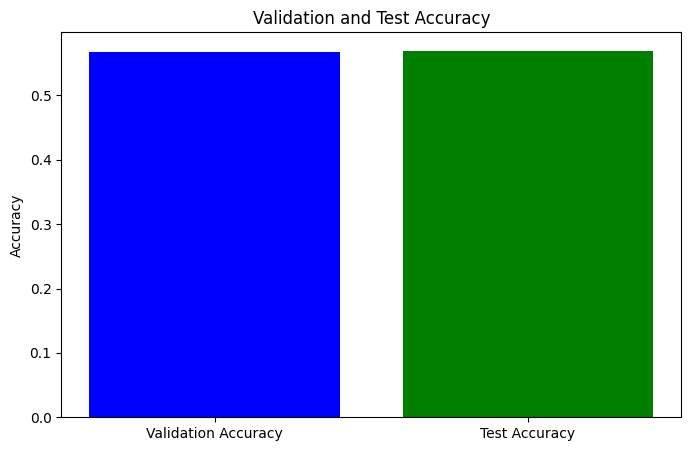

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Y_val_pred = model_pipelinee.predict(X_val)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
val_report = classification_report(Y_val, Y_val_pred, output_dict=True)

Y_test_pred = model_pipelinee.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_report = classification_report(Y_test, Y_test_pred, output_dict=True)

plt.figure(figsize=(8, 5))
labels = ['Validation Accuracy', 'Test Accuracy']
accuracy_scores = [val_accuracy, test_accuracy]
x = np.arange(len(labels))
plt.bar(x, accuracy_scores, color=['blue', 'green'])
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.title('Validation and Test Accuracy')
plt.show()

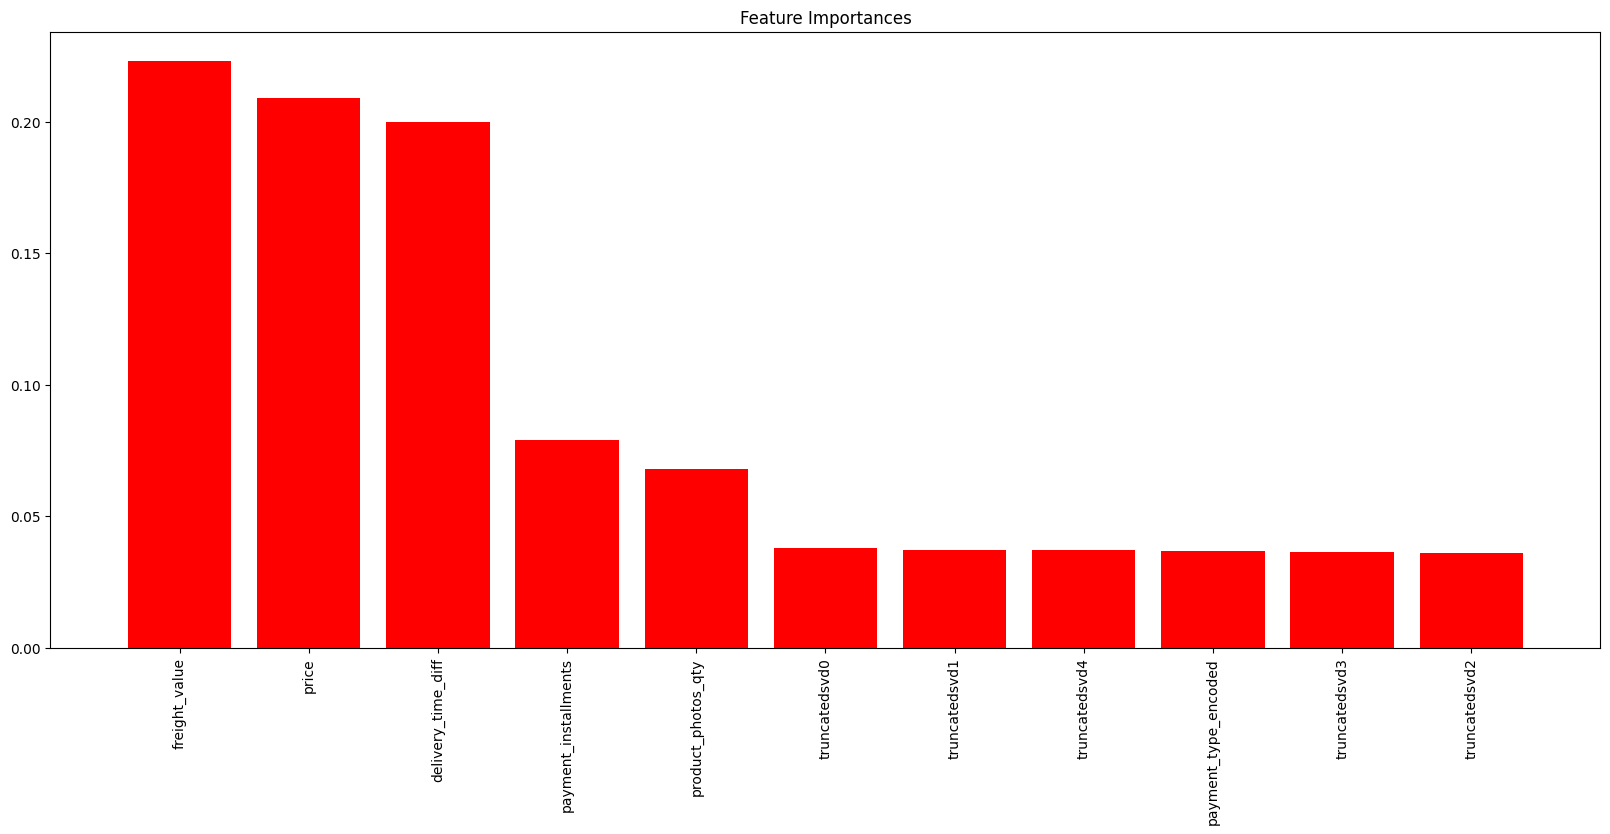

In [ ]:
importances = model_pipelinee.named_steps['classifier'].feature_importances_

feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numeric_features)  # Numeric features
feature_names = np.append(feature_names, preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))  # Categorical features

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color="r", align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

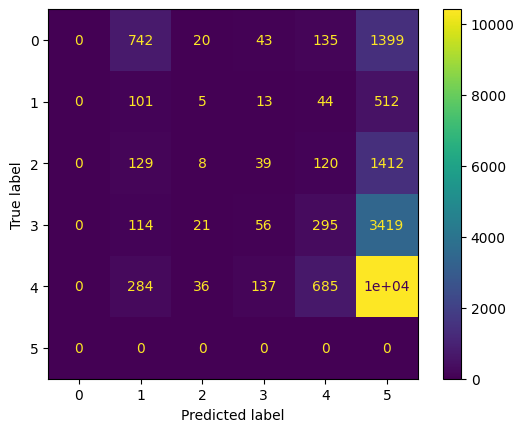

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
print("Type of Y_test:", type(Y_test))
print("Shape of Y_test:", Y_test.shape if hasattr(Y_test, 'shape') else "No shape attribute")

print("Type of Y_score:", type(Y_score))
print("Shape of Y_score:", Y_score.shape if hasattr(Y_score, 'shape') else "No shape attribute")


Type of Y_test: <class 'pandas.core.series.Series'>
Shape of Y_test: (20187,)


In [ ]:
from sklearn.preprocessing import label_binarize

classes = np.unique(Y_test)
Y_test_binarized = label_binarize(Y_test, classes=classes)
Y_score = model_pipelinee.predict_proba(X_test)


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

n_classes = Y_test_binarized.shape[1]
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_binarized[:, i], Y_score[:, i])
    average_precision[i] = average_precision_score(Y_test_binarized[:, i], Y_score[:, i])


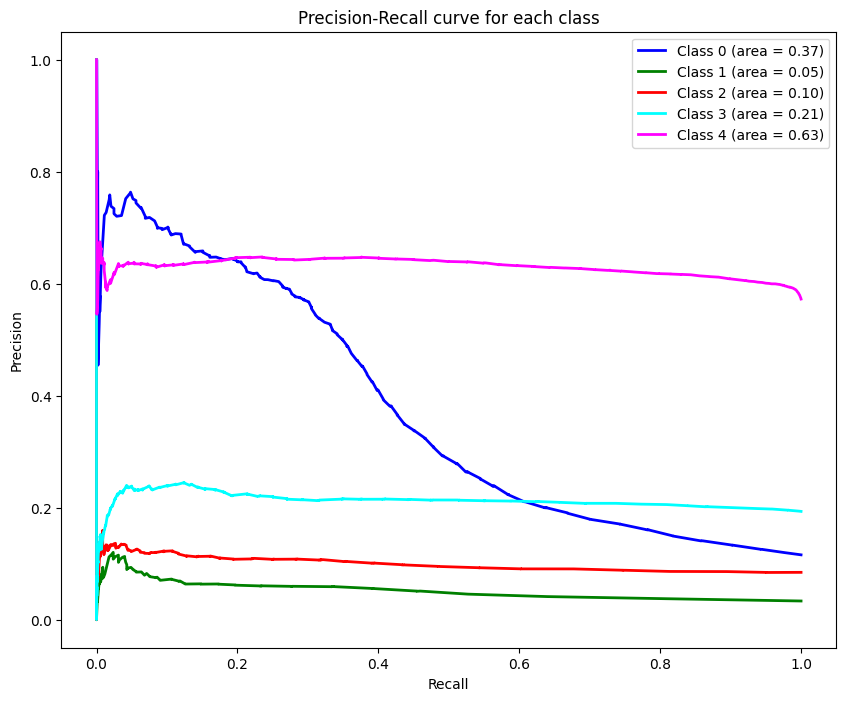

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend(loc="best")
plt.show()


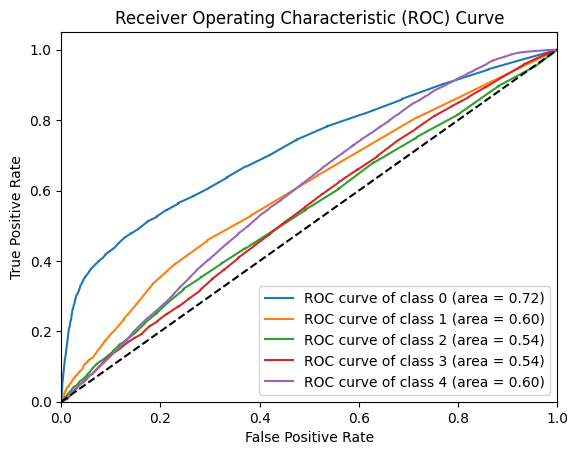

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
